In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('StudentsPerformance.csv')


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]
num_features,cat_features

(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [17]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['total_score'] / 3 
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [21]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
reading_full

np.int64(17)

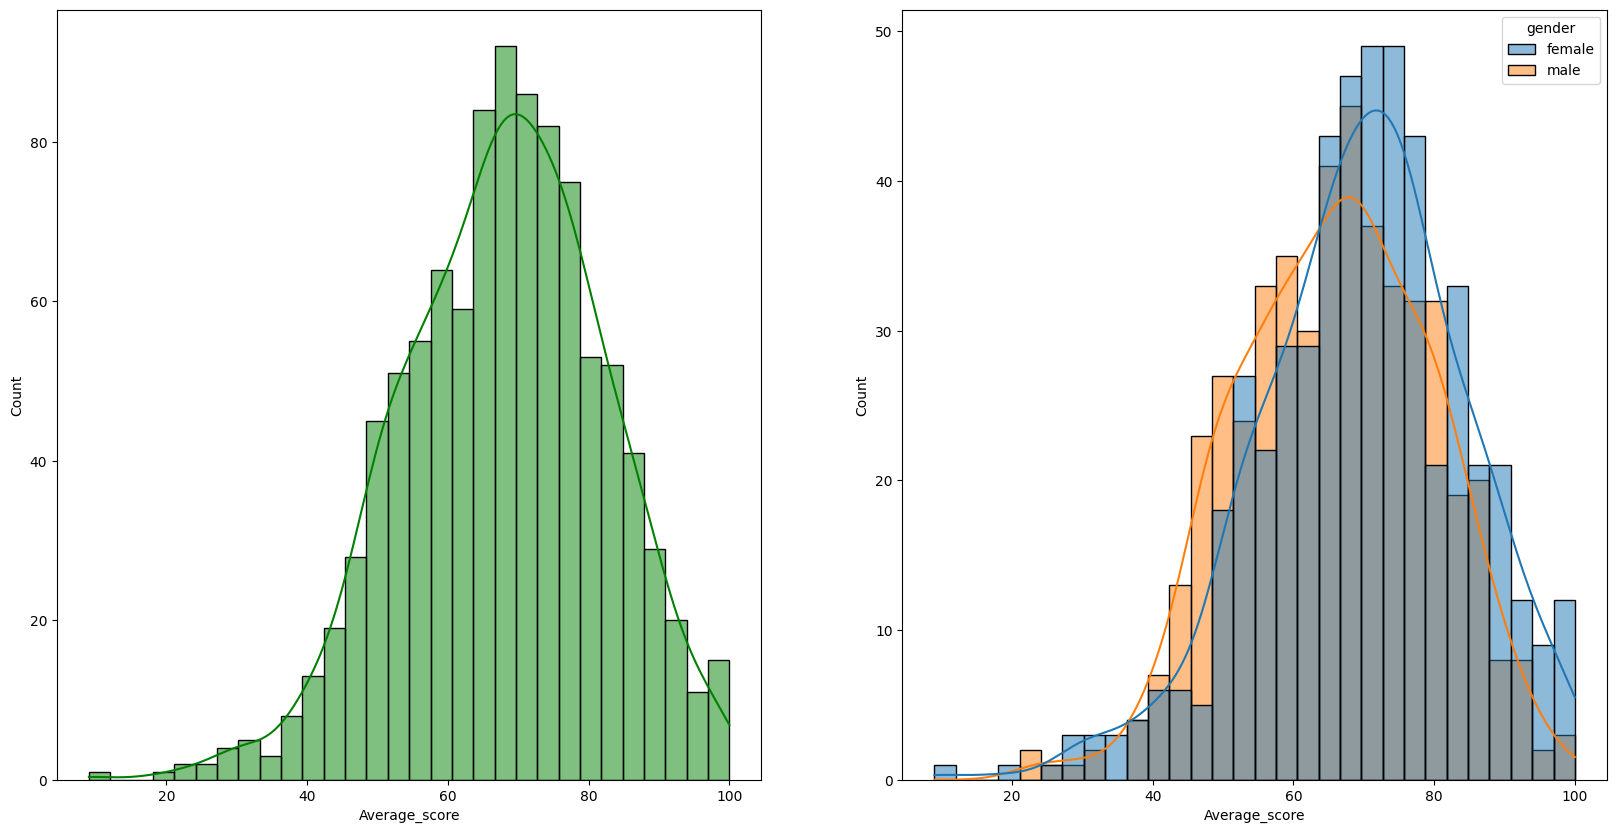

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.histplot(data = df,x=df['Average_score'],bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x=df['Average_score'],bins = 30,kde = True,hue = 'gender')
plt.show()


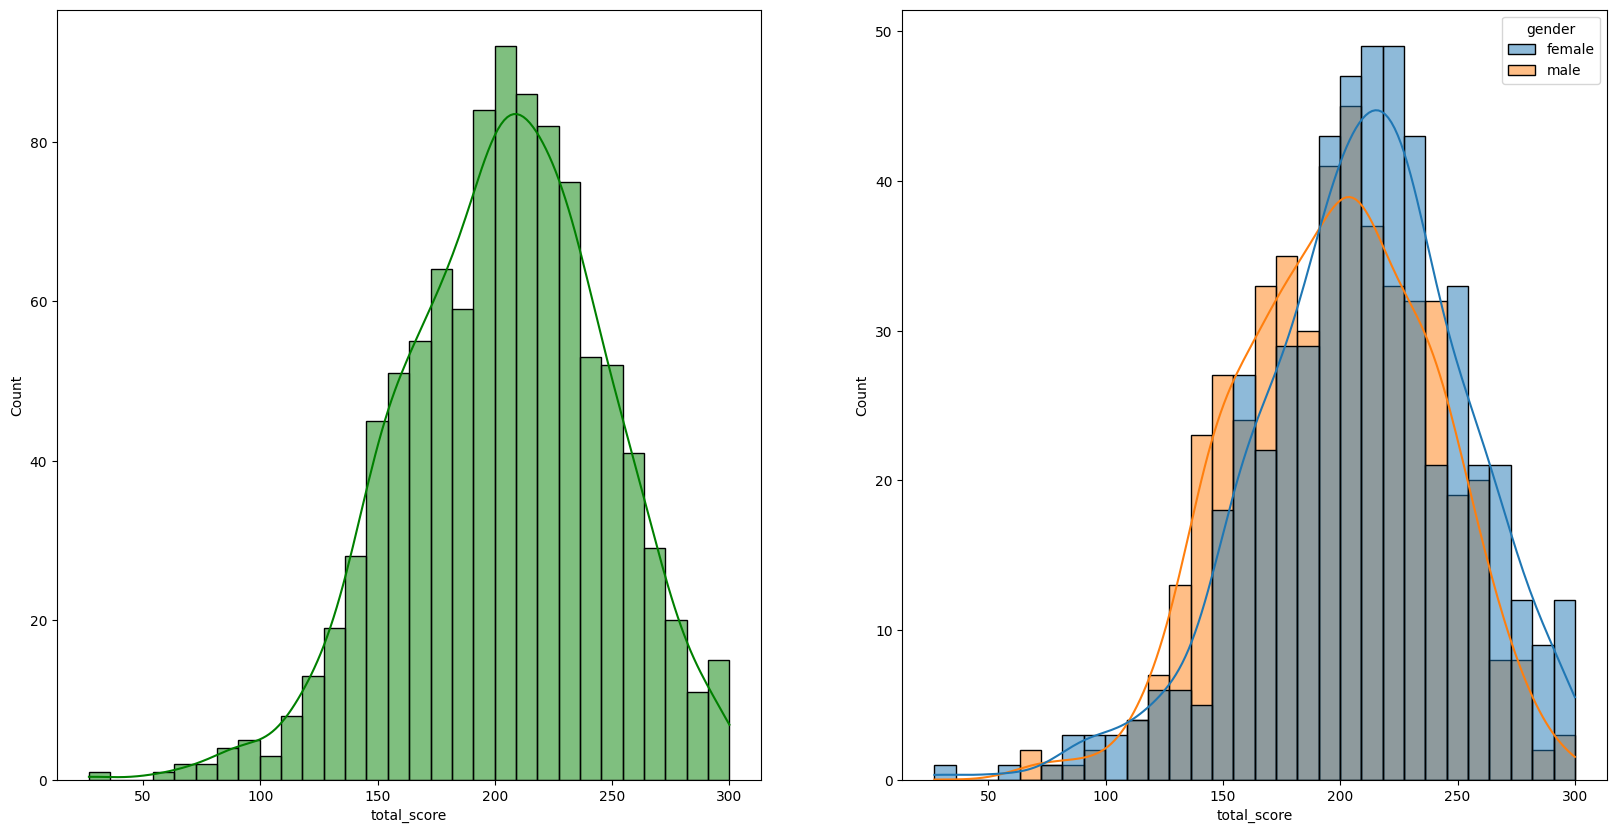

In [26]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.histplot(data = df,x=df['total_score'],bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x=df['total_score'],bins = 30,kde = True,hue = 'gender')
plt.show()

In [27]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [29]:
!pip install catboost


^C


  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
    --------------------------------------- 2.4/102.4 MB 14.6 MB/s eta 0:00:07
   -- ------------------------------------- 5.8/102.4 MB 14.9 MB/s eta 0:00:07
   --- ------------------------------------ 8.7/102.4 MB 14.8 MB/s eta 0:00:07
   ---- ----------------------------------- 11.0/102.4 MB 13.5 MB/s eta 0:00:07
   ----- ---------------------------------- 13.1/102.4 MB 12.6 MB/s eta 0:00:08
   ------ --------------------------------- 16.5/102.4 MB 13.2 MB/s eta 0:00:07
   ------- -------------------------------- 19.7/102.4 MB 13.3 MB/s eta 0:00:07
   -------- ------------------------------- 22.5/102.4 MB 13.4 MB/s eta 0:00:06
   --------- ------------------------------ 25.2/102.4 MB 13.6 MB/s eta 0:00:06
   ---------- ----------------------------- 27.5/102.4 MB 13.1 MB/s eta 0:00:06
   ----------- ---------------------------- 28.8/102.4 MB 12.7 MB/s e